<AxesSubplot:>

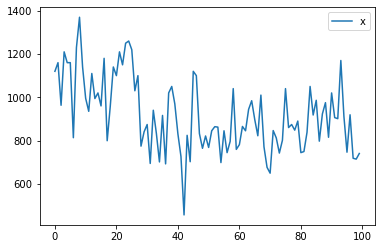

In [1]:
import pandas as pd
df=pd.read_csv('c:/data/time/nile.csv')
df.plot()

<AxesSubplot:>

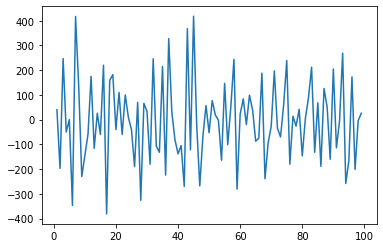

In [2]:
import matplotlib.pyplot as plt
diff1=df['x'].diff(periods=1).iloc[1:]
diff1.plot()

In [3]:
from statsmodels.tsa.stattools import adfuller
import numpy as np

diff=np.log(df['x']).diff(periods=1).iloc[1:]
result=adfuller(diff1)
print(result)
print(result[0])
print(result[1])

(-4.679734303955303, 9.184725988912368e-05, 9, 89, {'1%': -3.506057133647011, '5%': -2.8946066061911946, '10%': -2.5844100201994697}, 1098.5050597256875)
-4.679734303955303
9.184725988912368e-05


In [4]:
from pmdarima.arima import auto_arima
model=auto_arima(df,suppress_warnings=True)
model

ARIMA(order=(1, 1, 1), scoring_args={}, suppress_warnings=True,
      with_intercept=False)

In [5]:
print(df.shape)

(100, 1)


In [12]:
n=int(df.shape[0]*0.8)
print(n)
train=df[:n]
test=df[n:]

80


In [13]:
from statsmodels.tsa.arima_model import ARIMA
model=ARIMA(train,order=(1,1,1)).fit()

In [14]:
fore=model.forecast(steps=5)
print(fore)

(array([801.8456049 , 769.0654067 , 755.13174682, 747.61248256,
       742.2763498 ]), array([139.36759792, 147.2221301 , 148.10630422, 148.20880769,
       148.22082174]), array([[ 528.69013237, 1075.00107743],
       [ 480.51533399, 1057.61547942],
       [ 464.84872466, 1045.41476898],
       [ 457.12855729, 1038.09640783],
       [ 451.76887744, 1032.78382216]]))


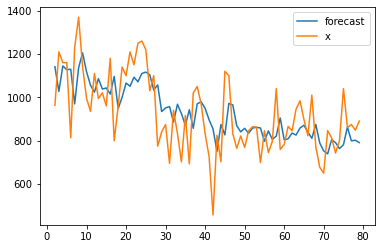

In [15]:
model.plot_predict()
plt.show()

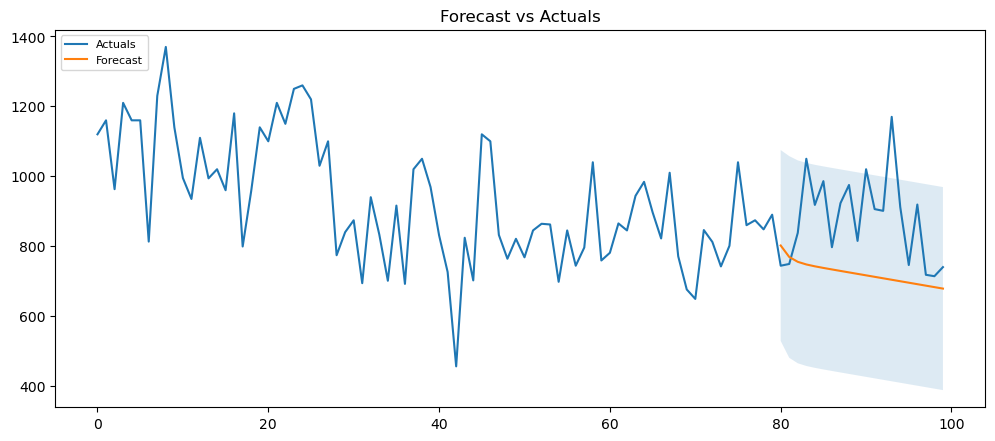

In [16]:
fc,se,conf=model.forecast(steps=len(test))
fc_series=pd.Series(fc,index=test.index)
lower=pd.Series(conf[:,0],index=test.index)
upper=pd.Series(conf[:,1],index=test.index)

plt.figure(figsize=(12,5), dpi=100)
plt.plot(df, label='Actuals')
plt.plot(fc_series, label='Forecast')
plt.fill_between(lower.index, lower, upper, alpha=.15)
plt.title('Forecast vs Actuals')
plt.legend(loc='upper left', fontsize=8)
plt.show()